**Import libraries and Read Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import json
import re
import nltk

In [2]:
movies_df = pd.read_csv("source_data/movies_metadata.csv")
credits_df = pd.read_csv("source_data/credits.csv")
links_sm_df = pd.read_csv("source_data/links_small.csv")
ratings_sm_df = pd.read_csv("source_data/ratings_small.csv")
tmdb5000_credits_df  = pd.read_csv("source_data/tmdb_5000_credits.csv")
tmdb5000_movies_df = pd.read_csv("source_data/tmdb_5000_movies.csv")
pd.set_option('display.max_columns', None)

C:\Users\chanc\AppData\Local\Temp\ipykernel_23124\1850975939.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("source_data/movies_metadata.csv")


In [3]:
movies_df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


**Remove all NaN Values**

In [24]:
# Dropping Rows with Any "NaN" Values
movies_df = movies_df.dropna() 

**Delete and Renaming the columns**

In [4]:
# Delete Columns "homepage", "from the movies_df 
movies_df.drop(columns=["homepage", "poster_path"], axis=1, inplace=True)

In [5]:
# Rename all columns from movies_df
movies_df.rename(columns={"adult": "Adult", "belongs_to_collection": "Movie_Collection", "budget": "Budget", "genres": "Genres", "id": "ID", "imdb_id": "IMDB_ID", "original_language": "Original_Language", "original_title": "Original_Title", "overview": "Overview", "popularity": "Popularity", "production_companies": "Production_Companies", "production_countries": "Production_Countries", "release_date": "Release_Date", "revenue": "Revenue", "runtime": "Runtime", "spoken_languages": "Spoken_languages", "status":"Status", "tagline":"Tagline", "title":"Title", "video":"Video", "vote_average":"Ratings", "vote_count":"Voters_Count"}, inplace=True)

**Parse JSON into String for Genres**

In [7]:
def parse_genres(genre_str):
    genres = json.loads(genre_str.replace("\'", "\""))
    return pd.Series({
        "Id": [genre["id"] for genre in genres],
        "Genres": [genre["name"] for genre in genres]
    })

if "Genres" in movies_df.columns:
    movies_df[["Id", "Genres"]] = movies_df["Genres"].apply(parse_genres)

In [8]:
movies_df = movies_df.drop(columns=["Id"])

In [9]:
movies_df.head()

,Adult,Movie_Collection,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


**Parse JSON into String for Movies Collection**

In [10]:
def parse_collection(collection_str):
    try:
        collection = json.loads(collection_str.replace("\'", "\""))
        return pd.Series({
            "Collection_id": collection.get("id"),
            "Collection_Name": collection.get("name"),
            "Poster_Path": collection.get("poster_path"),
            "Backdrop_Path": collection.get("backdrop_path")
        })
    except (json.JSONDecodeError, TypeError, AttributeError):
        return pd.Series([None, None, None, None], index=["Collection_id", "Collection_Name", "Poster_Path", "Backdrop_Path"])

if "Movie_Collection" in movies_df.columns:
    movies_df[["Collection_id", "Collection_Name", "Poster_Path", "Backdrop_Path"]] = movies_df["Movie_Collection"].apply(parse_collection)

In [11]:
movies_df = movies_df.drop(columns=['Movie_Collection', 'Collection_id', 'Poster_Path', 'Backdrop_Path'])


In [12]:
cols = list(movies_df.columns)
cols.insert(1, cols.pop(cols.index('Collection_Name')))
movies_df = movies_df[cols]



In [13]:
movies_df.head()

,Adult,Collection_Name,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,None,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,None,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


**Parse JSON into String for Production_Companies**

In [15]:
def parse_prod_companies(companies_str):
    if isinstance(companies_str, str):
        try:
            companies = json.loads(companies_str.replace("'", '"'))
            company_names = [company.get("name") for company in companies]
            company_ids = [company.get("id") for company in companies]
            return pd.Series({
                "Company_Names": company_names,
                "Company_Ids": company_ids
            })
        except (json.JSONDecodeError, KeyError):
            pass
    return pd.Series({"Company_Names": None, "Company_Ids": None})

if "Production_Companies" in movies_df.columns:
    movies_df[["Company_Names", "Company_Ids"]] = movies_df["Production_Companies"].apply(parse_prod_companies)


In [16]:
movies_df = movies_df.drop(columns=['Company_Ids', "Production_Companies"])


In [17]:
movies_df.rename(columns={"Company_Names":"Production_Companies"}, inplace=True)

In [18]:
cols = list(movies_df.columns)
cols.insert(11, cols.pop(cols.index('Production_Companies')))
movies_df = movies_df[cols]



In [19]:
movies_df.head()

,Adult,Collection_Name,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,Production_Countries,Production_Companies,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",[Pixar Animation Studios],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,None,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...","[TriStar Pictures, Teitler Film, Interscope Co...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...","[Warner Bros., Lancaster Gate]",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,None,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",[Twentieth Century Fox Film Corporation],1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...","[Sandollar Productions, Touchstone Pictures]",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


**Parse JSON into String for Production_Country**

In [25]:
def parse_prod_countries(countries_str):
    try:
        countries = json.loads(countries_str.replace("\'", "\""))
        return pd.Series({
            "Country_Names": [country.get("name") for country in countries],
            "ISO_Codes": [country.get("iso") for country in countries]
        })
    except (json.JSONDecodeError, TypeError):
        return pd.Series({"Country_Names": None, "ISO_Codes": None})

if "Production_Countries" in movies_df.columns:
    movies_df[["Country_Names", "ISO_Codes"]] = movies_df["Production_Countries"].apply(parse_prod_countries)


In [27]:
movies_df = movies_df.drop(columns=['Production_Countries', 'ISO_Codes'])

In [28]:
movies_df.rename(columns={"Country_Names":"Production_Country"}, inplace=True)

In [29]:
cols = list(movies_df.columns)
cols.insert(10, cols.pop(cols.index('Production_Country')))
movies_df = movies_df[cols]

In [30]:
movies_df.head()

,Adult,Collection_Name,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,Production_Country,Production_Companies,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,[United States of America],"[Warner Bros., Lancaster Gate]",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
4,False,Father of the Bride Collection,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,[United States of America],"[Sandollar Productions, Touchstone Pictures]",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
9,False,James Bond Collection,58000000,"[Adventure, Action, Thriller]",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,"[United Kingdom, United States of America]","[United Artists, Eon Productions]",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
12,False,Balto Collection,0,"[Family, Animation, Adventure]",21032,tt0112453,en,Balto,An outcast half-wolf risks his life to prevent...,12.140733,[United States of America],"[Universal Pictures, Amblin Entertainment, Amb...",1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0
18,False,Ace Ventura Collection,30000000,"[Crime, Comedy, Adventure]",9273,tt0112281,en,Ace Ventura: When Nature Calls,"Summoned from an ashram in Tibet, Ace finds hi...",8.205448,[United States of America],"[O Entertainment, Warner Bros., Morgan Creek P...",1995-11-10,212385533.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,False,6.1,1128.0


**Parse JSON into String for Spoken Languages**

In [31]:
def parse_spoken_languages(languages_str):
    try:
        languages = json.loads(languages_str.replace("\'", "\""))
        if isinstance(languages, list):
            return pd.Series({
                "Language_Name": [lang.get("name") for lang in languages],
                "ISO_Codes": [lang.get("iso") for lang in languages]
            })
    except (json.JSONDecodeError, TypeError, KeyError):
        pass
    return pd.Series({"Language_Name": None, "ISO_Codes": None})

movies_df[['Language_Name', 'ISO_Codes']] = movies_df['Spoken_languages'].apply(parse_spoken_languages)


In [32]:
movies_df = movies_df.drop(columns=['Spoken_languages'])
movies_df.rename(columns={"Language_Name":"Spoken_Languages"}, inplace=True)
cols = list(movies_df.columns)
cols.insert(15, cols.pop(cols.index('Spoken_Languages')))
movies_df = movies_df[cols]

In [33]:
movies_df.head(5)

,Adult,Collection_Name,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,Production_Country,Production_Companies,Release_Date,Revenue,Runtime,Spoken_Languages,Status,Tagline,Title,Video,Ratings,Voters_Count,ISO_Codes
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,[United States of America],"[Warner Bros., Lancaster Gate]",1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,[None]
4,False,Father of the Bride Collection,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,[United States of America],"[Sandollar Productions, Touchstone Pictures]",1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,[None]
9,False,James Bond Collection,58000000,"[Adventure, Action, Thriller]",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,"[United Kingdom, United States of America]","[United Artists, Eon Productions]",1995-11-16,352194034.0,130.0,"[English, Pусский, Español]",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,"[None, None, None]"
12,False,Balto Collection,0,"[Family, Animation, Adventure]",21032,tt0112453,en,Balto,An outcast half-wolf risks his life to prevent...,12.140733,[United States of America],"[Universal Pictures, Amblin Entertainment, Amb...",1995-12-22,11348324.0,78.0,[English],Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0,[None]
18,False,Ace Ventura Collection,30000000,"[Crime, Comedy, Adventure]",9273,tt0112281,en,Ace Ventura: When Nature Calls,"Summoned from an ashram in Tibet, Ace finds hi...",8.205448,[United States of America],"[O Entertainment, Warner Bros., Morgan Creek P...",1995-11-10,212385533.0,90.0,[English],Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,False,6.1,1128.0,[None]


In [38]:
movies_df.columns

Index(['Adult', 'Collection_Name', 'Budget', 'Genres', 'ID', 'IMDB_ID',
       'Original_Language', 'Original_Title', 'Overview', 'Popularity',
       'Production_Country', 'Production_Companies', 'Release_Date', 'Revenue',
       'Runtime', 'Spoken_Languages', 'Status', 'Tagline', 'Title', 'Video',
       'Ratings', 'Voters_Count', 'ISO_Codes'],
      dtype='object')

**Converting Data type of the columns to the right type**

In [40]:
movies_df.dtypes

Adult                    object
Collection_Name          object
Budget                   object
Genres                   object
ID                       object
IMDB_ID                  object
Original_Language        object
Original_Title           object
Overview                 object
Popularity               object
Production_Country       object
Production_Companies     object
Release_Date             object
Revenue                 float64
Runtime                 float64
Spoken_Languages         object
Status                   object
Tagline                  object
Title                    object
Video                    object
Ratings                 float64
Voters_Count            float64
ISO_Codes                object
dtype: object

In [51]:
movies_df['Budget'] = pd.to_numeric(movies_df['Budget'], errors='coerce').astype('float64')
movies_df['Popularity'] = pd.to_numeric(movies_df['Popularity'], errors='coerce')

In [52]:
movies_df.dtypes

Adult                    object
Collection_Name          object
Budget                  float64
Genres                   object
ID                       object
IMDB_ID                  object
Original_Language        object
Original_Title           object
Overview                 object
Popularity              float64
Production_Country       object
Production_Companies     object
Release_Date             object
Revenue                 float64
Runtime                 float64
Spoken_Languages         object
Status                   object
Tagline                  object
Title                    object
Video                    object
Ratings                 float64
Voters_Count            float64
ISO_Codes                object
dtype: object

**Which language has the highest average Voting**

In [53]:
movies_df.columns

Index(['Adult', 'Collection_Name', 'Budget', 'Genres', 'ID', 'IMDB_ID',
       'Original_Language', 'Original_Title', 'Overview', 'Popularity',
       'Production_Country', 'Production_Companies', 'Release_Date', 'Revenue',
       'Runtime', 'Spoken_Languages', 'Status', 'Tagline', 'Title', 'Video',
       'Ratings', 'Voters_Count', 'ISO_Codes'],
      dtype='object')

In [54]:
# Present Top Languages
language_counts = movies_df["Original_Language"].value_counts()

# Display the Top 10 results
print("\nTop 10 Languages:")
print(language_counts.head(10))


Top 10 Languages:
Original_Language
en    1689
ja      76
fr      30
it      28
cn      22
de      14
hi      13
zh      10
sv       9
ru       8
Name: count, dtype: int64


In [55]:
# Filter for the languages "en", "ger", "fr", "esp"
top_languages = ["en", "de", "fr", "it", "ja", "es"]

# Filter the DataFrame
filtered_df = movies_df[movies_df["Original_Language"].isin(top_languages)]

In [56]:
# Calculate the average ratings for each language
average_ratings = filtered_df.groupby('Original_Language')['Ratings'].mean()
print(average_ratings)

Original_Language
de    5.585714
en    5.867496
es    6.100000
fr    6.003333
it    5.732143
ja    6.452632
Name: Ratings, dtype: float64


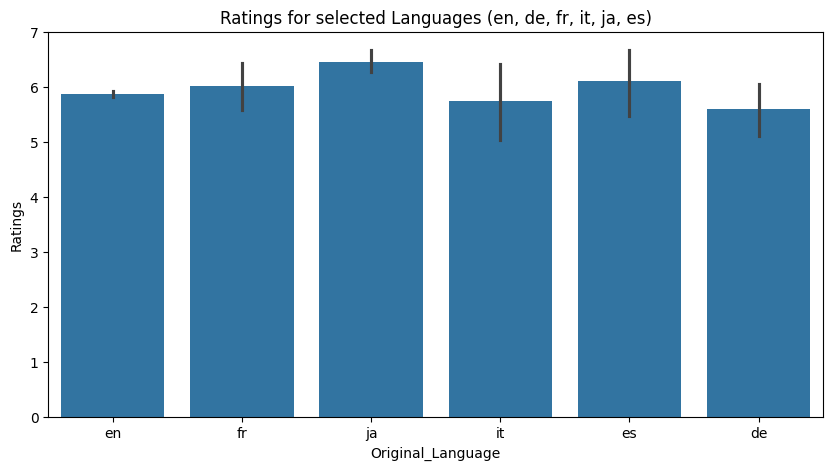

In [57]:
# Create the Bar Plot
plt.figure(figsize=(10,5))
sns.barplot(x="Original_Language", y="Ratings", data=filtered_df)
plt.title("Ratings for selected Languages (en, de, fr, it, ja, es)")
plt.show()

**Create a model to filter Keywords based on ratings**

In [48]:
movies_df.head(2)

,Adult,Collection_Name,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,Production_Country,Production_Companies,Release_Date,Revenue,Runtime,Spoken_Languages,Status,Tagline,Title,Video,Ratings,Voters_Count,ISO_codes
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[United States of America],[Pixar Animation Studios],1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0,NaN
1,False,None,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,[United States of America],"[TriStar Pictures, Teitler Film, Interscope Co...",1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN
